<a href="https://colab.research.google.com/github/Emtenan5/Information-Retrieval-/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from __future__ import print_function
from nltk.metrics import *
Sentence1='There are many similarity measures used in NLTK package'.split()
Sentence2='There are many similarity measures are avaliable in NLTK '.split()
print(accuracy(Sentence1,Sentence2))
print(Sentence1)
print(Sentence2)

0.5555555555555556
['There', 'are', 'many', 'similarity', 'measures', 'used', 'in', 'NLTK', 'package']
['There', 'are', 'many', 'similarity', 'measures', 'are', 'avaliable', 'in', 'NLTK']


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
print (classification_report(Sentence1,Sentence2))

              precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   avaliable       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        many       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
     package       0.00      0.00      0.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

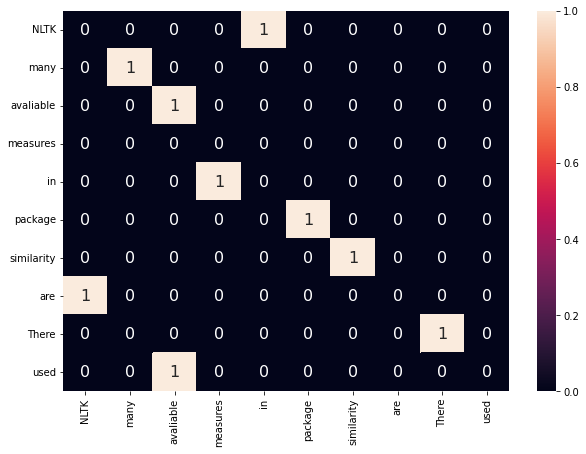

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
col1=set(Sentence1) 
col2=set(Sentence2)
dic=col1.union(col2)
array=confusion_matrix(Sentence1,Sentence2)
df_cm = pd.DataFrame(array,index=dic,columns=dic) 
df_cm
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 

In [18]:
from __future__ import print_function
def _edit_dist_int(len1,len2):
  leve = []
  for i in range(len1):
    lev.append([0]*len2) #initialize 20 array to zero
    for i in range(len1):
      lev[i][0]=i#column0: 0,1,2,3,4,...
      for j in range(len2):
        lev[0][j]=j #row 0: 0,1,2,3,4,...
        return lev

In [23]:
def _edit_dist_step(lev,i,j,s1,s2,transpositions=False):
 c1=s1[i-1]
 c2=s2[j-1]
 #skipping a character in s1
 a=lev[i-1][j]+1
 #skipping a character in s2
 b=lev[i][j-1]+1
 #substitution
 c=lev[i-1][j-1]+(substitution_cost if c1 !=c2 else 0)
 #transposition
 d=c+1 #never picked by default
 if transpositions and i > 1 and j > 1:
   if s1[i-2]==c2 and s2[j-2]==c1:
     d=lev[i-2][j-2]+1
     #pick the cheapest
 lev[i][j]= min(a,b,c,d)

In [25]:
def edit_distance(s1,s2,transpositions=False):
  #set up a 2-D array
  len1 = len(s1)
  len2 = len(s2)
  lev = _edit_distance_init(len1 + 1,len2 + 1)
  #iterate over the array
  for i in range(len1):
    for j in range(len2):
      _edit_dist_step(lev,i,j,s1,s2,transpositions=transpositions)
  return lev[len1][len2]

In [27]:
import nltk
from nltk.metrics import *
dis = edit_distance("suggestion","calculation")
print(dis)

7


In [28]:
def jacc_similarity(query, document):
 first=set(query).intersection(set(document))
 second=set(query).union(set(document))
 return len(first)/len(second) 
x = input('enter a sentense:').split()
query=set(x)
document = set(Sentence2)
print (jaccard_distance(query,document))

enter a sentense: Jaccard's Coefficient
1.0


In [30]:
def binary_distance(label1, label2): 
 return 0.0 if label1 == label2 else 1.0
 x=set(Sentence1)
 Y=set(Sentence2)
 binary_distance(X, Y)

In [31]:
def masi(label1, label2): 
 len_intersection = len(label1.intersection(label2)) 
 len_union = len(label1.union(label2)) 
 len_label1 = len(label1) 
 len_label2 = len(label2) 

 if len_label1 == len_label2 and len_label1 == len_intersection:
    m = 1
 elif len_intersection == min(len_label1, len_label2): 
   m = 0.67
 elif len_intersection > 0:
    m = 0.33
 else:
    m = 0
 return 1 - (len_intersection / float(len_union)) * m 
X=set([10,20,30,40]) 
Y=set([30,50,70]) 
masi(X, Y)

0.945